![fantasy_wallpaper](https://wallup.net/wp-content/uploads/2017/05/29/441913-Asian-monochrome-landscape-fantasy_art-748x408.jpg)

**_photo credit:https://wallup.net_**

# Heroes of Pymoli

### Loading the required libraries & Reading .csv file into a dataframe

In [1]:
# Loading the required libraries
import pandas as pd
import numpy as np
# File to Load from the Resources folder 
file_to_load = "Resources/purchase_data.csv"
# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

## Let's explore the dataframe

In [2]:
# Show the first 5 rows of the dataframe
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [3]:
# Number of rows and number of columns in this dataframe
purchase_data.shape

(780, 7)

### The dataframe has 780 rows and 7 columns

In [4]:
# Let's get the list of column headers
purchase_data.columns.values

array(['Purchase ID', 'SN', 'Age', 'Gender', 'Item ID', 'Item Name',
       'Price'], dtype=object)

In [5]:
# Basic information of the dataframe by the info() method
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Purchase ID  780 non-null    int64  
 1   SN           780 non-null    object 
 2   Age          780 non-null    int64  
 3   Gender       780 non-null    object 
 4   Item ID      780 non-null    int64  
 5   Item Name    780 non-null    object 
 6   Price        780 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 42.8+ KB


In [6]:
# Let's check for missing data
missing_data = purchase_data.isnull()
# Let's count the number of missing data (if any)
for column in missing_data.columns.values.tolist():
    print("Missing Data Count:",missing_data[column].value_counts())

Missing Data Count: False    780
Name: Purchase ID, dtype: int64
Missing Data Count: False    780
Name: SN, dtype: int64
Missing Data Count: False    780
Name: Age, dtype: int64
Missing Data Count: False    780
Name: Gender, dtype: int64
Missing Data Count: False    780
Name: Item ID, dtype: int64
Missing Data Count: False    780
Name: Item Name, dtype: int64
Missing Data Count: False    780
Name: Price, dtype: int64


### Hooray !! No missing data in this Dataframe

# Analyzing the DataFrame

## Player Count

### Display the total number of players


In [7]:
# Count the unique values in SN using nunique() command
no_of_players = purchase_data["SN"].nunique()
# Let's calculate total number of players using value_counts()
players_count = len(purchase_data["SN"].value_counts())
# Let's create a total player DataFrame
data = {'Total number of Players':[players_count]} # Data
df_total = pd.DataFrame(data) # Create DataFrame
df_total # Display DataFrame

,Total number of Players
0,576


### There are total of 576 players

## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [8]:
# Let's calculate the number of Unique items
no_of_unique_items = len(purchase_data["Item ID"].value_counts())
# Let's calculate total revenue which is aggregation of sales 
total_revenue = round(purchase_data["Price"].sum(),2)
# Number of purchases is total length of the purchase ID column 
no_of_purchases = len(purchase_data["Purchase ID"])
# Average price = Total Price / No of items
avg_price = round((total_revenue / no_of_purchases),2)
# Format avg_price and total_revenue in dollars
avg_price = '$'+ str(avg_price)
total_revenue ='$' + str(total_revenue)
# Let's create a summary DataFrame
data = {'Number of Unique Items':[no_of_unique_items],\
        'Average Price':[avg_price],\
        'Number of Purchases':[no_of_purchases],\
        'Total Revenue':[total_revenue]
       }
df_summary = pd.DataFrame(data) # Create DataFrame
df_summary # Display DataFrame

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,183,$3.05,780,$2379.77


### 576 players made 780 purchases bringing in total revenue close to 2400 dollars

## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [9]:
# Let's see the unique genders in the DataFrame
purchase_data["Gender"].unique().tolist()

['Male', 'Other / Non-Disclosed', 'Female']

#### We have three unique gender categories, let's analyze their purchases

In [10]:
# Let's create a sub DataFrame with only 'Male' customers
df_male = purchase_data[purchase_data.Gender =="Male"]
# Since "SN" is an unqiue identifier, let's count that column
Male_number = len(df_male["SN"].value_counts())
# Let's calculate percentage of males
Male_percent = round((100*(Male_number/no_of_players)),2)
# Let's create a sub DataFrame with only 'Female' customers
df_female = purchase_data[purchase_data.Gender =="Female"]
# Since "SN" is an unqiue identifier, let's count that column
Female_number = len(df_female["SN"].value_counts())
# Let's calculate percentage of males
Female_percent = round((100*(Female_number/no_of_players)),2)
# Let's create a sub DataFrame with only 'Other/Non-Disclosed' customers
df_other = purchase_data[purchase_data.Gender =="Other / Non-Disclosed"]
# Since "SN" is an unqiue identifier, let's count that column
Other_number = len(df_other["SN"].value_counts())
# Let's calculate percentage of males
Other_percent = round((100*(Other_number/no_of_players)),2)
# Let's create a new DataFrame
Gender_df = pd.DataFrame({"Gender": ["Male","Female","Other / Non-Disclosed"],\
                          "Total Count":[Male_number, Female_number,Other_number],\
                          "Percentage of Players":[Male_percent,Female_percent,Other_percent]})
# Format the percentage column
Gender_df["Percentage of Players"] = Gender_df["Percentage of Players"].\
                                                astype(float).map("{:,.2f}%".format)
# Convert the Gender column to index and drop it from the DataFrame
Gender_df = Gender_df.set_index("Gender", drop=True)
# Create a copy of the DataFrame for display
Gender_final_df = Gender_df.copy()
# Remove the index name
Gender_final_df.index.name=None
Gender_final_df # Display the DataFrame

,Total Count,Percentage of Players
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%


## Sales are strongly biased by gender, 84% of customers are Male


## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [11]:
# Let's groupby Purchase ID column in the Dataframe by gender
grouped_purchase_id = purchase_data["Purchase ID"].groupby(purchase_data["Gender"]) # Create a GroupBy object
# Let's count the number of purchases made by each gender
Purchase_count = grouped_purchase_id.count()
Purchase_count.head()

Gender
Female                   113
Male                     652
Other / Non-Disclosed     15
Name: Purchase ID, dtype: int64

In [12]:
# Let's groupby Price column in the Dataframe by gender
grouped_price = purchase_data["Price"].groupby(purchase_data["Gender"]) # Create a GroupBy object
# Let's count the average purchases price by each gender
Average_price = round(grouped_price.mean(),2)
Average_price.head()

Gender
Female                   3.20
Male                     3.02
Other / Non-Disclosed    3.35
Name: Price, dtype: float64

In [13]:
# Let's count the total purchases price by each gender
Total_price = round(grouped_price.sum(),2)
Total_price.head()

Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64

In [14]:
# Let's create a new DataFrame with the above series
df_summary = pd.DataFrame({"Purchase Count": Purchase_count,\
                           "Average Purchase Price": Average_price,\
                           "Total Purchase Value": Total_price,\
                                    })
# Let's select only the Total Count column from Gender_df DataFrame
df_total = Gender_df["Total Count"]
# Let's select only the Total Purchase Value column from df_summary DataFrame
df_purchase_value = df_summary["Total Purchase Value"]
# Let's make a new dataframe with only these two columns
df_new = pd.merge(df_total,df_purchase_value, on="Gender", how="left")
# Let's calculate average total purchase per person
df_new["Avg. Total Purchase per Person"]=round(df_new["Total Purchase Value"].divide(df_new["Total Count"],axis=0),2)
# Let's keep only the average total purchase column
df_new.drop(["Total Count","Total Purchase Value"],axis=1,inplace=True)
# Merge this column with the previous DataFrame to create the final DataFrame
Purchase_summary_df = pd.merge(df_summary,df_new,on="Gender", how="left")
Purchase_summary_df["Average Purchase Price"] = Purchase_summary_df["Average Purchase Price"].\
                                                astype(float).map("${:,.2f}".format)
Purchase_summary_df["Total Purchase Value"] = Purchase_summary_df["Total Purchase Value"].\
                                                astype(float).map("${:,.2f}".format)
Purchase_summary_df["Avg. Total Purchase per Person"] = Purchase_summary_df["Avg. Total Purchase per Person"].\
                                                astype(float).map("${:,.2f}".format)
# Remove the index name
# Purchase_summary_df.index.name=None
Purchase_summary_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg. Total Purchase per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


### Male customers are 6x more in number, but they spend 5x more than the Female customers

## Female customers spend more per person than the Male customers

## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [15]:
# Figure out the minimum and maximum ages of the players
max_age = purchase_data["Age"].max()
min_age = purchase_data["Age"].min()
print('Maximum and minimum ages are {} and {} respectively.'.format(max_age,min_age))

Maximum and minimum ages are 45 and 7 respectively.


## Visualizing the Age Demographics

In [16]:
# Create bins in which we shall keep the values of customers based on ages
bins = [0, 9, 14, 19, 24, 29, 34, 39, 50]
# Create labels for these bins
bin_labels = ["<10", "10-14", "15-19", "20-24", "24-29", "30-34",\
                "35-39", "40+"]

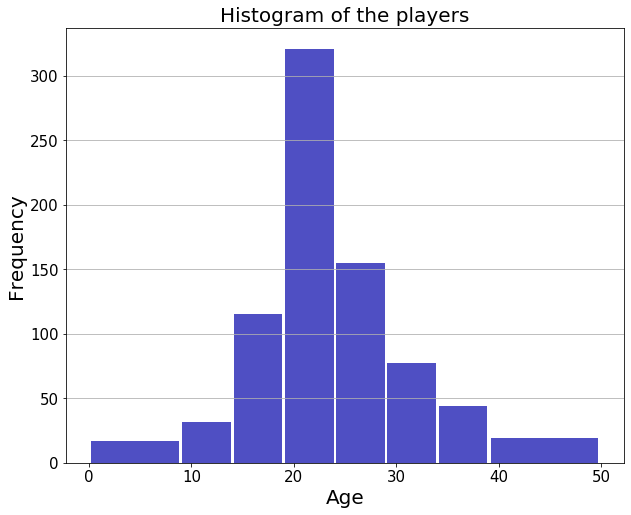

In [17]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
# age_array is the data we would like to plot
age_array = purchase_data.loc[:,"Age"].values
plt.figure(figsize=[10,8])
plt.hist(age_array,bins=bins,facecolor='#0504aa',alpha=0.7,rwidth=0.95)
plt.grid(axis='y')
plt.xlabel('Age',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram of the players',fontsize=20)
plt.show()

In [18]:
# Copy the original DataFrame to a new DataFrame
df_binned = purchase_data.copy()
# Place the data series into a new column inside of the DataFrame
df_binned["Age Ranges"] = pd.cut(df_binned["Age"],bins=bins,labels=bin_labels)
# Reset the index of the new DataFrame
df_binned.reset_index(drop=True,inplace=True)
df_binned.head() # Display the DataFrame

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Ranges
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,20-24
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56,40+
2,2,Ithergue48,24,Male,92,Final Critic,4.88,20-24
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27,20-24
4,4,Iskosia90,23,Male,131,Fury,1.44,20-24


In [19]:
# Create a GroupBy object based upon "Age Group"
age_group = df_binned.groupby("Age Ranges")

In [20]:
# Let's see the unique number of customers in each group
age_binned = age_group["SN"].nunique()

In [21]:
# Let's create a new DataFrame
age_binned_df = pd.DataFrame({"Total Count": age_binned})
# Convert the Total Count to percentages and round them to 2 decimal places
age_binned_df["Percentage of Players"]=round(100*(age_binned_df["Total Count"]/age_binned_df["Total Count"].sum(axis=0)),2)
# Create a new DataFrame for formatting the percentage column
age_binned_format_df = age_binned_df.copy()
# Format the percentage column
age_binned_format_df["Percentage of Players"] = age_binned_df["Percentage of Players"].\
                                                astype(float).map("{:,.2f}%".format)
age_binned_format_df # Display the DataFrame

,Total Count,Percentage of Players
Age Ranges,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
24-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


### Age group (20-24) purchased the highest number of items (~ 45%)

## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [22]:
# Let's groupby Purchase ID column in the Dataframe by Age Group
grouped_purchase_id = df_binned["Purchase ID"].groupby(df_binned["Age Ranges"]) # Create a GroupBy object
# Let's count the number of purchases made by each Age Group
Purchase_age_count = grouped_purchase_id.count()
Purchase_age_count

Age Ranges
<10       23
10-14     28
15-19    136
20-24    365
24-29    101
30-34     73
35-39     41
40+       13
Name: Purchase ID, dtype: int64

In [23]:
# Let's groupby Price column in the Dataframe by Age Group
grouped_price = df_binned["Price"].groupby(df_binned["Age Ranges"]) # Create a GroupBy object
# Let's count the average price of purchases made by each Age Group
Average_age_price = round(grouped_price.mean(),2)
Average_age_price

Age Ranges
<10      3.35
10-14    2.96
15-19    3.04
20-24    3.05
24-29    2.90
30-34    2.93
35-39    3.60
40+      2.94
Name: Price, dtype: float64

In [24]:
# Let's count the total price of purchases made by each Age Group
Total_age_price = round(grouped_price.sum(),2)
Total_age_price

Age Ranges
<10        77.13
10-14      82.78
15-19     412.89
20-24    1114.06
24-29     293.00
30-34     214.00
35-39     147.67
40+        38.24
Name: Price, dtype: float64

In [25]:
# Let's create a new DataFrame
Age_summary_df = pd.DataFrame({"Purchase Count": Purchase_age_count,\
                                    "Average Purchase Price": Average_age_price,\
                                    "Total Purchase Value": Total_age_price})
# Let's select only the Total Count column from age_binned_df DataFrame
df_total = age_binned_df["Total Count"]
# Let's select only the Total Purchase Value column from Age_summary_df DataFrame
df_purchase_value = Age_summary_df["Total Purchase Value"]
# Let's make a new dataframe with only these two columns
df_new = pd.merge(df_total,df_purchase_value, on="Age Ranges", how="left")
# Let's calculate average total purchase per person
df_new["Avg. Total Purchase per Person"]=round(df_new["Total Purchase Value"].divide(df_new["Total Count"],axis=0),2)
# Let's keep only the average total purchase column
df_new.drop(["Total Count","Total Purchase Value"],axis=1,inplace=True)
# Merge this column with the previous DataFrame to create the final DataFrame
df_age_summary = pd.merge(Age_summary_df,df_new,on="Age Ranges", how="left")
# Formating the average price, total purchase and average total purchase per person columns
df_age_summary["Average Purchase Price"] = df_age_summary["Average Purchase Price"].\
                                                astype(float).map("${:,.2f}".format)
df_age_summary["Total Purchase Value"] = df_age_summary["Total Purchase Value"].\
                                                astype(float).map("${:,.2f}".format)
df_age_summary["Avg. Total Purchase per Person"] = df_age_summary["Avg. Total Purchase per Person"].\
                                                astype(float).map("${:,.2f}".format)
df_age_summary

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg. Total Purchase per Person
Age Ranges,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
24-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


### Age group (20-24) spend the most as a group while Age group (30-39) spend most per person

## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [26]:
# Let's group the Purchase ID column in the Dataframe by Serial Number
grouped_purchase_id = df_binned["Purchase ID"].groupby(df_binned["SN"]) # Create a GroupBy object
# Let's count the number of purchases made by each Serial Number
Purchase_SN_count = grouped_purchase_id.count()
Purchase_SN_count.head()

SN
Adairialis76    1
Adastirin33     1
Aeda94          1
Aela59          1
Aelaria33       1
Name: Purchase ID, dtype: int64

In [27]:
# Let's group the Price column in the Dataframe by Serial Number
grouped_price = df_binned["Price"].groupby(df_binned["SN"]) # Create a GroupBy object
# Let's count the number of purchases made by each Serial Number
Average_SN_price = round(grouped_price.mean(),2)
Average_SN_price.head()

SN
Adairialis76    2.28
Adastirin33     4.48
Aeda94          4.91
Aela59          4.32
Aelaria33       1.79
Name: Price, dtype: float64

In [28]:
# Let's count the "Total price" of purchases made by each Serial Number
Total_SN_price = round(grouped_price.sum(),2)
Total_SN_price.head()

SN
Adairialis76    2.28
Adastirin33     4.48
Aeda94          4.91
Aela59          4.32
Aelaria33       1.79
Name: Price, dtype: float64

In [29]:
# Let's create a new DataFrame with the above series
SN_summary_df = pd.DataFrame({"Purchase Count": Purchase_SN_count,\
                              "Average Purchase Price": Average_SN_price,\
                              "Total Purchase Value": Total_SN_price})
# Sorting the Total Purchase Value column in descending order
SN_summary_sort = SN_summary_df.sort_values(by="Total Purchase Value",ascending=False)
# Formating the average purchase price and total purchase value per SN columns
SN_summary_sort["Average Purchase Price"] = SN_summary_sort["Average Purchase Price"].\
                                                astype(float).map("${:,.2f}".format)
SN_summary_sort["Total Purchase Value"] = SN_summary_sort["Total Purchase Value"].\
                                                astype(float).map("${:,.2f}".format)
SN_summary_sort.head() # Display the first 5 rows

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


### Lisosia93, Idastidru52 and Chamjask73 are the top three spenders

In [30]:
# Let's see which age group does the top spender Lisosia93 belong to
df_binned.loc[df_binned["SN"] == "Lisosia93"]

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Ranges
74,74,Lisosia93,25,Male,89,"Blazefury, Protector of Delusions",4.64,24-29
120,120,Lisosia93,25,Male,24,Warped Fetish,3.81,24-29
224,224,Lisosia93,25,Male,157,"Spada, Etcher of Hatred",4.80,24-29
603,603,Lisosia93,25,Male,141,Persuasion,3.19,24-29
609,609,Lisosia93,25,Male,40,Second Chance,2.52,24-29


In [31]:
# Let's see which age group does the second highest spender Idastidru52 belong to
df_binned.loc[df_binned["SN"] == "Idastidru52"]

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Ranges
290,290,Idastidru52,24,Male,147,"Hellreaver, Heirloom of Inception",4.93,20-24
490,490,Idastidru52,24,Male,148,"Warmonger, Gift of Suffering's End",4.03,20-24
543,543,Idastidru52,24,Male,121,Massacre,1.60,20-24
676,676,Idastidru52,24,Male,111,Misery's End,4.89,20-24


In [32]:
# Let's see which age group does the third highest spender Chamjask73 belong to
df_binned.loc[df_binned["SN"] == "Chamjask73"]

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Ranges
222,222,Chamjask73,22,Female,178,"Oathbreaker, Last Hope of the Breaking Storm",4.23,20-24
520,520,Chamjask73,22,Female,109,"Downfall, Scalpel Of The Emperor",4.76,20-24
564,564,Chamjask73,22,Female,52,Hatred,4.84,20-24


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [33]:
# Let's make a new DataFrame with Item ID, Item Name and Item Price columns
df_item = purchase_data[["Item ID","Item Name","Price"]]
df_item.head()

,Item ID,Item Name,Price
0,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,143,Frenzied Scimitar,1.56
2,92,Final Critic,4.88
3,100,Blindscythe,3.27
4,131,Fury,1.44


In [34]:
# Let's group "Item ID" in the Dataframe by both Item ID and Item Name 
grouped_item_id = df_item["Item ID"].groupby([df_item["Item ID"],df_item["Item Name"]]) # Create a GroupBy object
# Let's count the number of items by each Item ID and Item name
Item_ID_count = grouped_item_id.count()
Item_ID_count.head()

Item ID  Item Name         
0        Splinter              4
1        Crucifer              3
2        Verdict               6
3        Phantomlight          6
4        Bloodlord's Fetish    5
Name: Item ID, dtype: int64

In [35]:
# Let's group "Price" in the Dataframe by both Item ID and Item Name 
grouped_price = df_item["Price"].groupby([df_item["Item ID"],df_item["Item Name"]]) # Create a GroupBy object
# Let's count the number of items by each Item ID and Item name
Average_item_price = grouped_price.mean()
Average_item_price.head()

Item ID  Item Name         
0        Splinter              1.28
1        Crucifer              3.26
2        Verdict               2.48
3        Phantomlight          2.49
4        Bloodlord's Fetish    1.70
Name: Price, dtype: float64

In [36]:
# Let's count the "Total price" of purchases made by both Item ID and Item Name
Total_item_price = grouped_price.sum()
Total_item_price.head()

Item ID  Item Name         
0        Splinter               5.12
1        Crucifer               9.78
2        Verdict               14.88
3        Phantomlight          14.94
4        Bloodlord's Fetish     8.50
Name: Price, dtype: float64

In [37]:
# Let's create a new DataFrame with the above series
Item_summary_df = pd.DataFrame({"Purchase Count": Item_ID_count,\
                                 "Item Price": Average_item_price,\
                                 "Total Purchase Value": Total_item_price})
# Sorting the Purchase Count column in descending order
Item_summary_sort = Item_summary_df.sort_values(by="Purchase Count",ascending=False)
# Formating the average purchase price and total purchase value per SN columns
Item_summary_sort["Item Price"] = Item_summary_sort["Item Price"].\
                                          astype(float).map("${:,.2f}".format)
Item_summary_sort["Total Purchase Value"] = Item_summary_sort["Total Purchase Value"].\
                                                astype(float).map("${:,.2f}".format)
Item_summary_sort.head() # Display the first 5 rows

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


### Item IDs # 178, # 145, # 108 are the top three most popular items

## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [38]:
# Sorting the Total Purchase Value column in descending order
Item_total_sort = Item_summary_df.sort_values(by="Total Purchase Value",ascending=False)
# Formating the average purchase price and total purchase value per SN columns
Item_total_sort["Item Price"] = Item_total_sort["Item Price"].\
                                          astype(float).map("${:,.2f}".format)
Item_total_sort["Total Purchase Value"] = Item_total_sort["Total Purchase Value"].\
                                                astype(float).map("${:,.2f}".format)
Item_total_sort.head() # Display the first 5 rows

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80


### Item IDs # 178, # 82, # 145 are the top three most profitable items